In [1]:
import numpy as np
import scipy
import sys
from scipy.interpolate import RegularGridInterpolator

# from ...src.data_util import *
sys.path.append('../')

from src.data_util import load_dataset

Load in dataset

In [104]:
filenames = {'baseline_64': 'kolmogorov_re_1000/eval_2048x2048_64x64.nc'}

data = load_dataset(filenames,path='../data/')
data = data['baseline_64']

Create grids for checking interpolations

In [108]:
rows = int(32*1.4)
cols = 32

rows = 64
cols = 64

# print(data.x.min().values)
staggered_points = np.empty((rows,cols,2))
staggered_points[:,:,1] = np.linspace(data.x.min().values,data.x.max().values,rows)[:,np.newaxis]
for i in range(rows):
    point_row = np.linspace(data.y.min().values,data.y.max().values,cols)
    staggered_points[i,:,0] = point_row + i%2*((data.y.max().values-data.y.min().values)/cols/2) # stagger 
    # points[i,:,0] = point_row 

staggered_points = staggered_points.reshape(-1,2)

rectilinear_points = np.empty((rows,cols,2))
rectilinear_points[:,:,1] = np.linspace(data.x.min().values,data.x.max().values,rows)[:,np.newaxis]
for i in range(rows):
    point_row = np.linspace(data.y.min().values,data.y.max().values,cols)
    # rectilinear_points[i,:,0] = point_row + i%2*(1/cols/2) # stagger 
    rectilinear_points[i,:,0] = point_row 

rectilinear_points = rectilinear_points.reshape(-1,2)

In [ ]:
# interpolate
# X,Y = np.meshgrid(data.x,data.y,indexing='ij')
interp = RegularGridInterpolator((data.x.to_numpy(),data.y.to_numpy()),data.vorticity[0,0].to_numpy(),bounds_error=False)
staggered_vorticity = interp(staggered_points)
rectilinear_vorticity = interp(rectilinear_points)


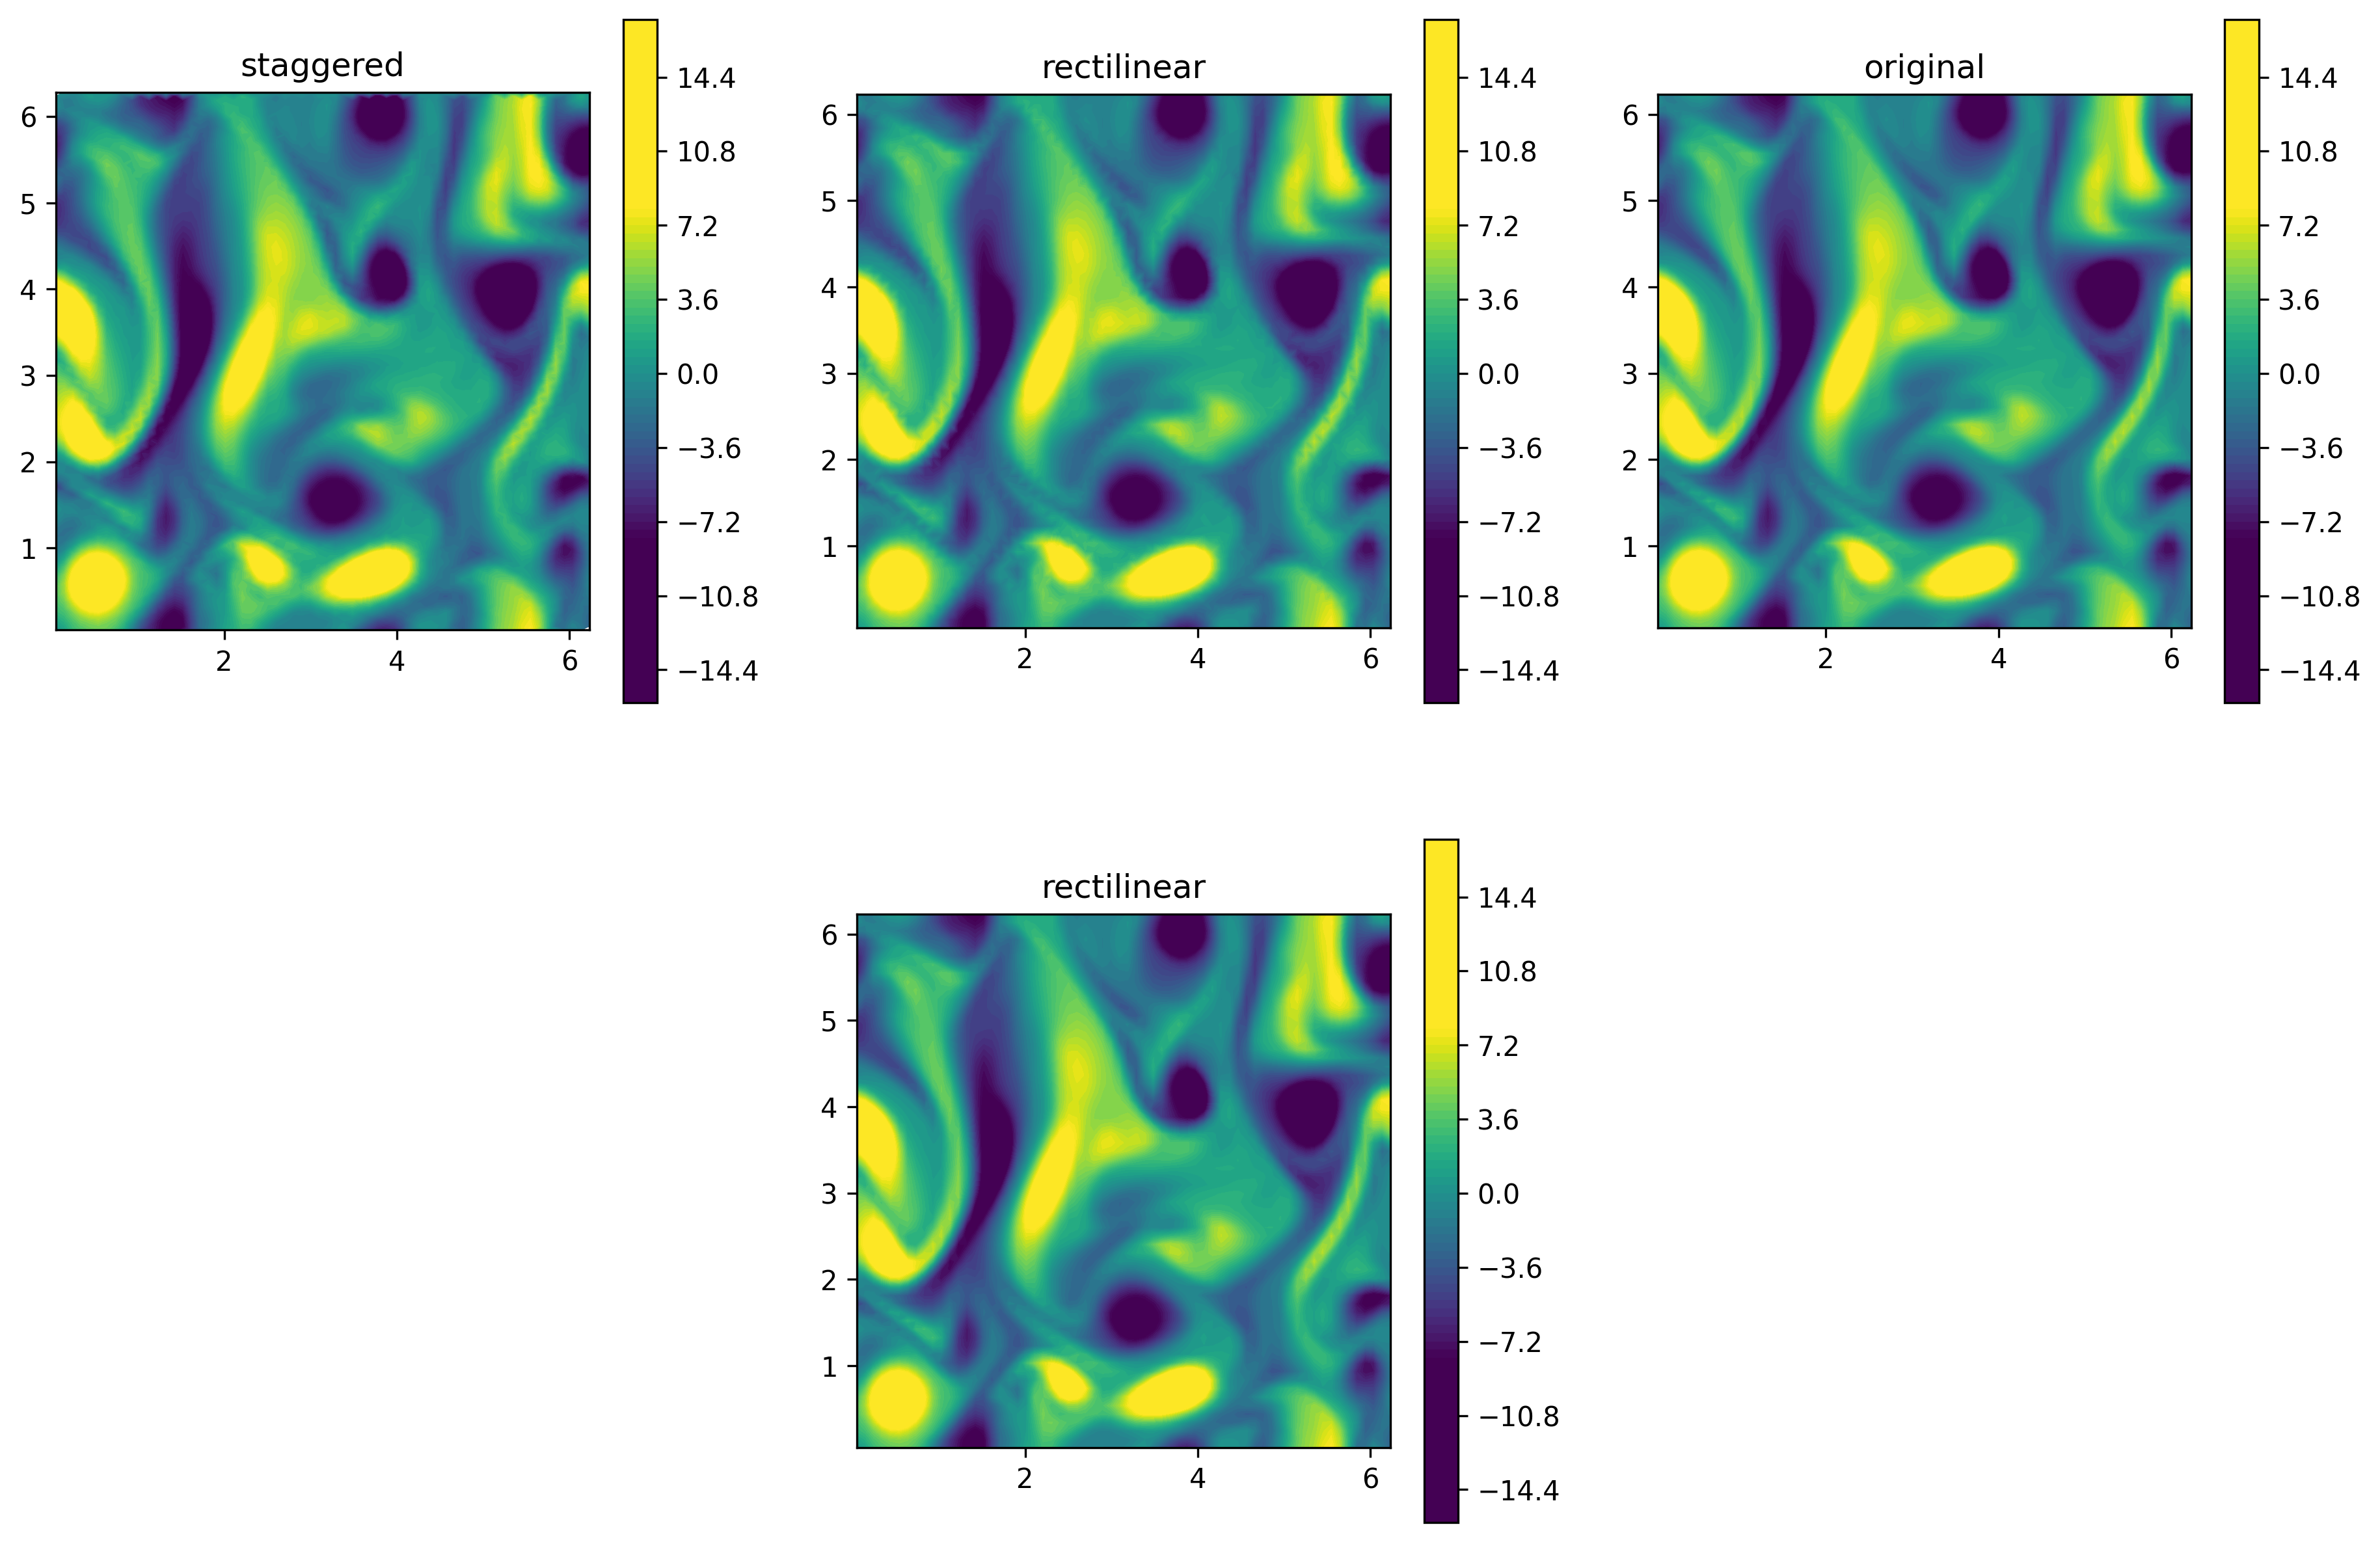

In [ ]:
from matplotlib import pyplot as plt

lims = (-8,8)

# print(staggered_vorticity)
# staggered_vorticity = np.clip(staggered_vorticity,lims[0],lims[1])
# rectilinear_vorticity = np.clip(rectilinear_vorticity,lims[0],lims[1])
staggered_vorticity = np.nan_to_num(staggered_vorticity)
rectilinear_vorticity = np.nan_to_num(rectilinear_vorticity)

fig = plt.figure(figsize=(15,10),dpi=300)
ax = fig.add_subplot(231)
# sc = ax.tricontourf(staggered_points[:,0],staggered_points[:,1],staggered_vorticity.flatten(),vmin=-5,vmax=5)
sc = ax.tricontourf(staggered_points[:,1],staggered_points[:,0],staggered_vorticity.flatten(),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
# ax.scatter(staggered_points[:,1],staggered_points[:,0],s=1,c='k')
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('staggered')
ax = fig.add_subplot(232)
sc = ax.tricontourf(rectilinear_points[:,1],rectilinear_points[:,0],rectilinear_vorticity.flatten(),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
# ax.scatter(rectilinear_points[:,1],rectilinear_points[:,0],s=1,c='k')
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('rectilinear')
ax = fig.add_subplot(233)
sc = ax.contourf(data.x,data.y,data.vorticity[0,0],vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('original')

ax = fig.add_subplot(235)
# sc = ax.tricontourf(rectilinear_points[:,1],rectilinear_points[:,0],rectilinear_vorticity.flatten(),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
rectilinear_points_shaped = rectilinear_points.reshape(rows,cols,2)
sc = ax.contourf(rectilinear_points_shaped[:,:,1],rectilinear_points_shaped[:,:,0],rectilinear_vorticity.reshape(rows,cols),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
# ax.scatter(rectilinear_points[:,1],rectilinear_points[:,0],s=1,c='k')
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('rectilinear')

plt.show()

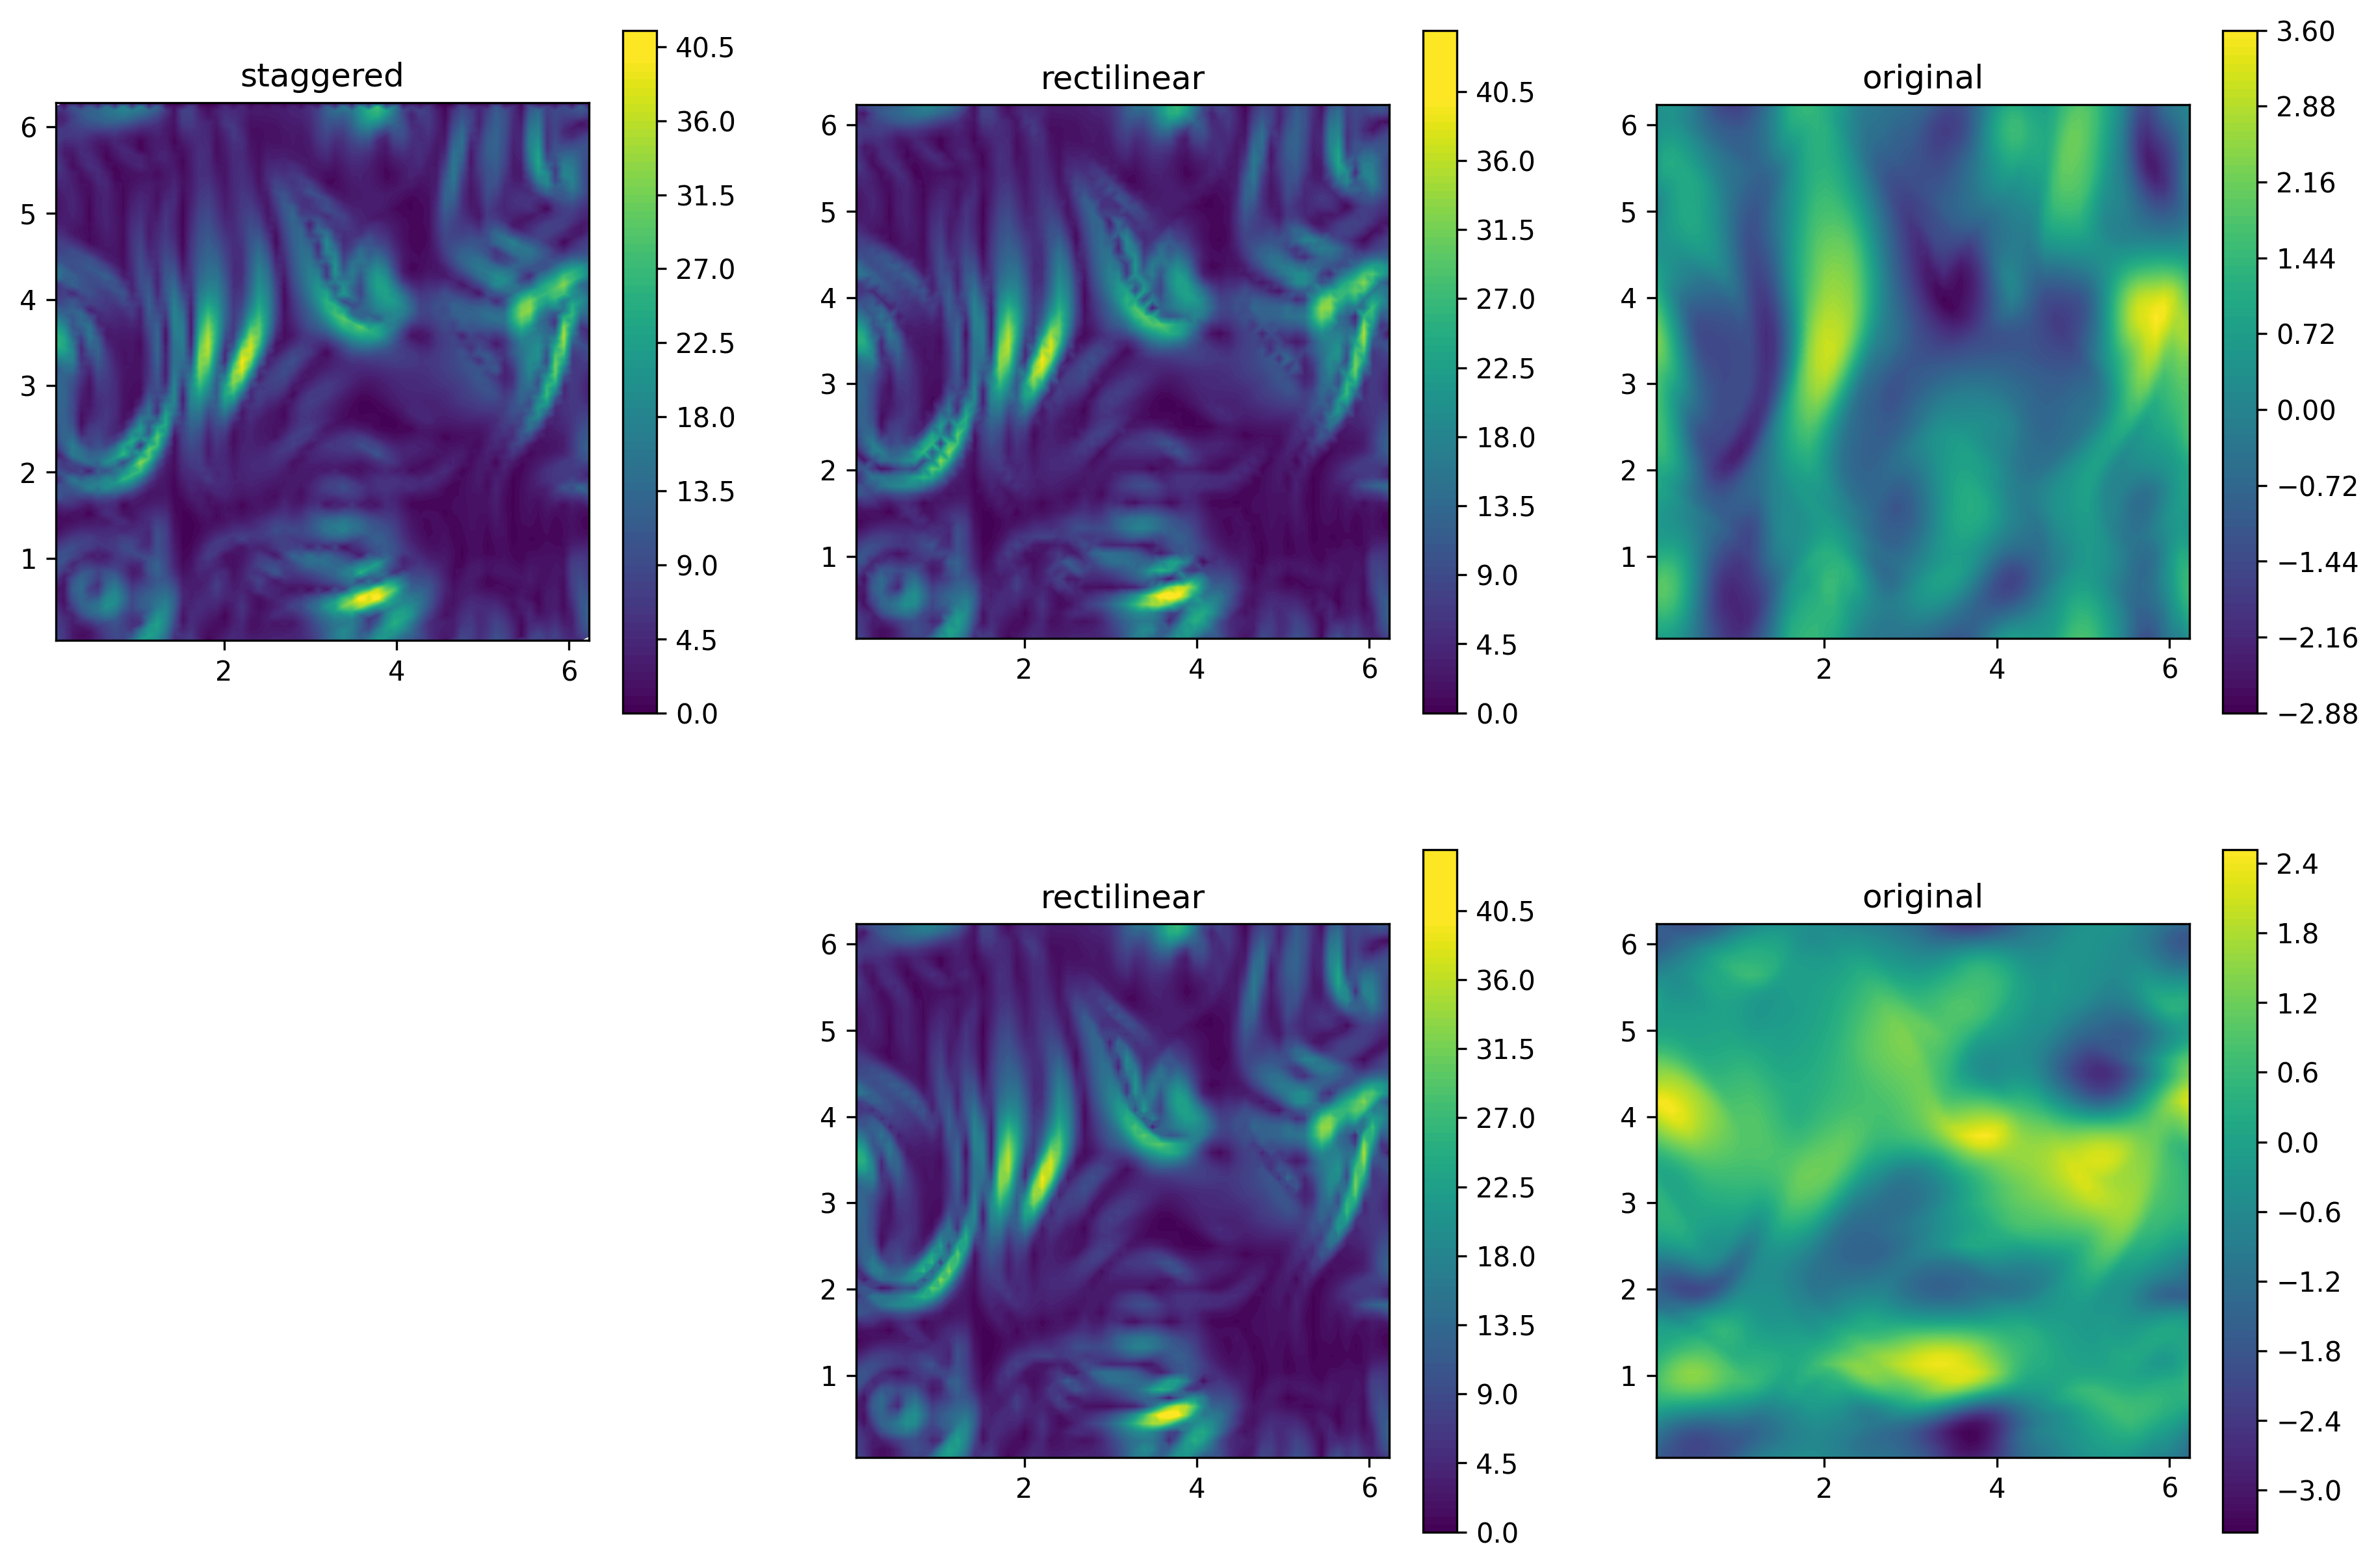

In [115]:
def calculate_derivitives_scalar(model):
    vel_squared = model.u**2 + model.v**2
    dudx = np.gradient(vel_squared,axis=-2)/np.gradient(model.x)[:,np.newaxis]
    dudy = np.gradient(vel_squared,axis=-1)/np.gradient(model.y)[np.newaxis,:]
    model['derivitive_scalar'] = (model.dims,np.sqrt(dudx**2 + dudy**2))

calculate_derivitives_scalar(data)

lims = (0,40)

interp = RegularGridInterpolator((data.x.to_numpy(),data.y.to_numpy()),data.derivitive_scalar[0,0].to_numpy(),bounds_error=False)
staggered_derivitive = interp(staggered_points)
rectilinear_derivitive = interp(rectilinear_points)

staggered_derivitive = np.nan_to_num(staggered_derivitive)
rectilinear_derivitive = np.nan_to_num(rectilinear_derivitive)

fig = plt.figure(figsize=(15,10),dpi=300)
ax = fig.add_subplot(231)
# sc = ax.tricontourf(staggered_points[:,0],staggered_points[:,1],staggered_vorticity.flatten(),vmin=-5,vmax=5)
sc = ax.tricontourf(staggered_points[:,1],staggered_points[:,0],staggered_derivitive.flatten(),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
# ax.scatter(staggered_points[:,1],staggered_points[:,0],s=1,c='k')
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('staggered')
ax = fig.add_subplot(232)
sc = ax.tricontourf(rectilinear_points[:,1],rectilinear_points[:,0],rectilinear_derivitive.flatten(),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
# ax.scatter(rectilinear_points[:,1],rectilinear_points[:,0],s=1,c='k')
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('rectilinear')
ax = fig.add_subplot(233)
sc = ax.contourf(data.x,data.y,data.u[0,0],extend='neither',levels=100)
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('original')

ax = fig.add_subplot(236)
sc = ax.contourf(data.x,data.y,data.v[0,0],extend='neither',levels=100)
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('original')

ax = fig.add_subplot(235)
# sc = ax.tricontourf(rectilinear_points[:,1],rectilinear_points[:,0],rectilinear_vorticity.flatten(),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
rectilinear_points_shaped = rectilinear_points.reshape(rows,cols,2)
sc = ax.contourf(rectilinear_points_shaped[:,:,1],rectilinear_points_shaped[:,:,0],rectilinear_derivitive.reshape(rows,cols),vmin=lims[0],vmax=lims[1],extend='neither',levels=100)
# ax.scatter(rectilinear_points[:,1],rectilinear_points[:,0],s=1,c='k')
plt.colorbar(sc,ax=ax)
ax.set_aspect('equal')
ax.set_title('rectilinear')

plt.show()